In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer, RobustScaler, QuantileTransformer,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split, KFold, cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d shubhammeshram579/house

house.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/house.zip

Archive:  /content/house.zip
replace Housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv("/content/Housing.csv")

In [ ]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509.000000,509.000000,506.000000,509.000000,507.000000,509.000000,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000,508.000000,509.000000
mean,3.707516,11.296660,11.198281,0.068762,0.555216,6.279845,68.579134,3.787705,9.610236,409.216110,18.463851,356.664892,12.705276,22.501572
std,8.732089,23.269781,6.856713,0.253298,0.115633,0.703449,28.114744,2.101852,8.735069,168.814161,2.161553,91.562469,7.131979,9.183497
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.075000,2.100700,4.000000,279.000000,17.400000,375.330000,7.092500,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.150000,3.182700,5.000000,330.000000,19.100000,391.450000,11.430000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#Adding target variable to dataframe
data['PRICE'] = data['MEDV']
data.drop(['MEDV'] ,axis=1,inplace=True)
# Median value of owner-occupied homes in $1000s

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [ ]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       503
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        354
DIS        411
RAD          9
TAX         66
PTRATIO     46
B          356
LSTAT      453
PRICE      228
dtype: int64

In [ ]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
PRICE      0
dtype: int64

In [ ]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,NaN,307,21.0,386.85,6.58,23.1
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3.0,252,18.3,395.62,NaN,34.9
45,0.17142,0.0,NaN,0,0.448,5.682,33.8,5.1004,3.0,233,17.9,396.90,10.21,19.3
66,0.04379,80.0,NaN,0,0.398,5.787,31.1,6.6115,4.0,337,16.1,396.90,10.24,19.4
72,0.09164,0.0,10.81,0,NaN,6.065,7.8,5.2873,4.0,305,19.2,390.91,5.52,22.8
86,0.05188,0.0,NaN,0,0.449,6.015,45.1,4.4272,3.0,247,18.5,395.99,12.86,22.5
115,0.17134,0.0,10.01,0,0.547,5.928,NaN,2.4631,6.0,432,17.8,344.91,15.76,18.3
118,0.13058,0.0,10.01,0,NaN,5.872,73.1,2.4775,6.0,432,17.8,338.63,15.37,20.4


In [ ]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<Axes: >

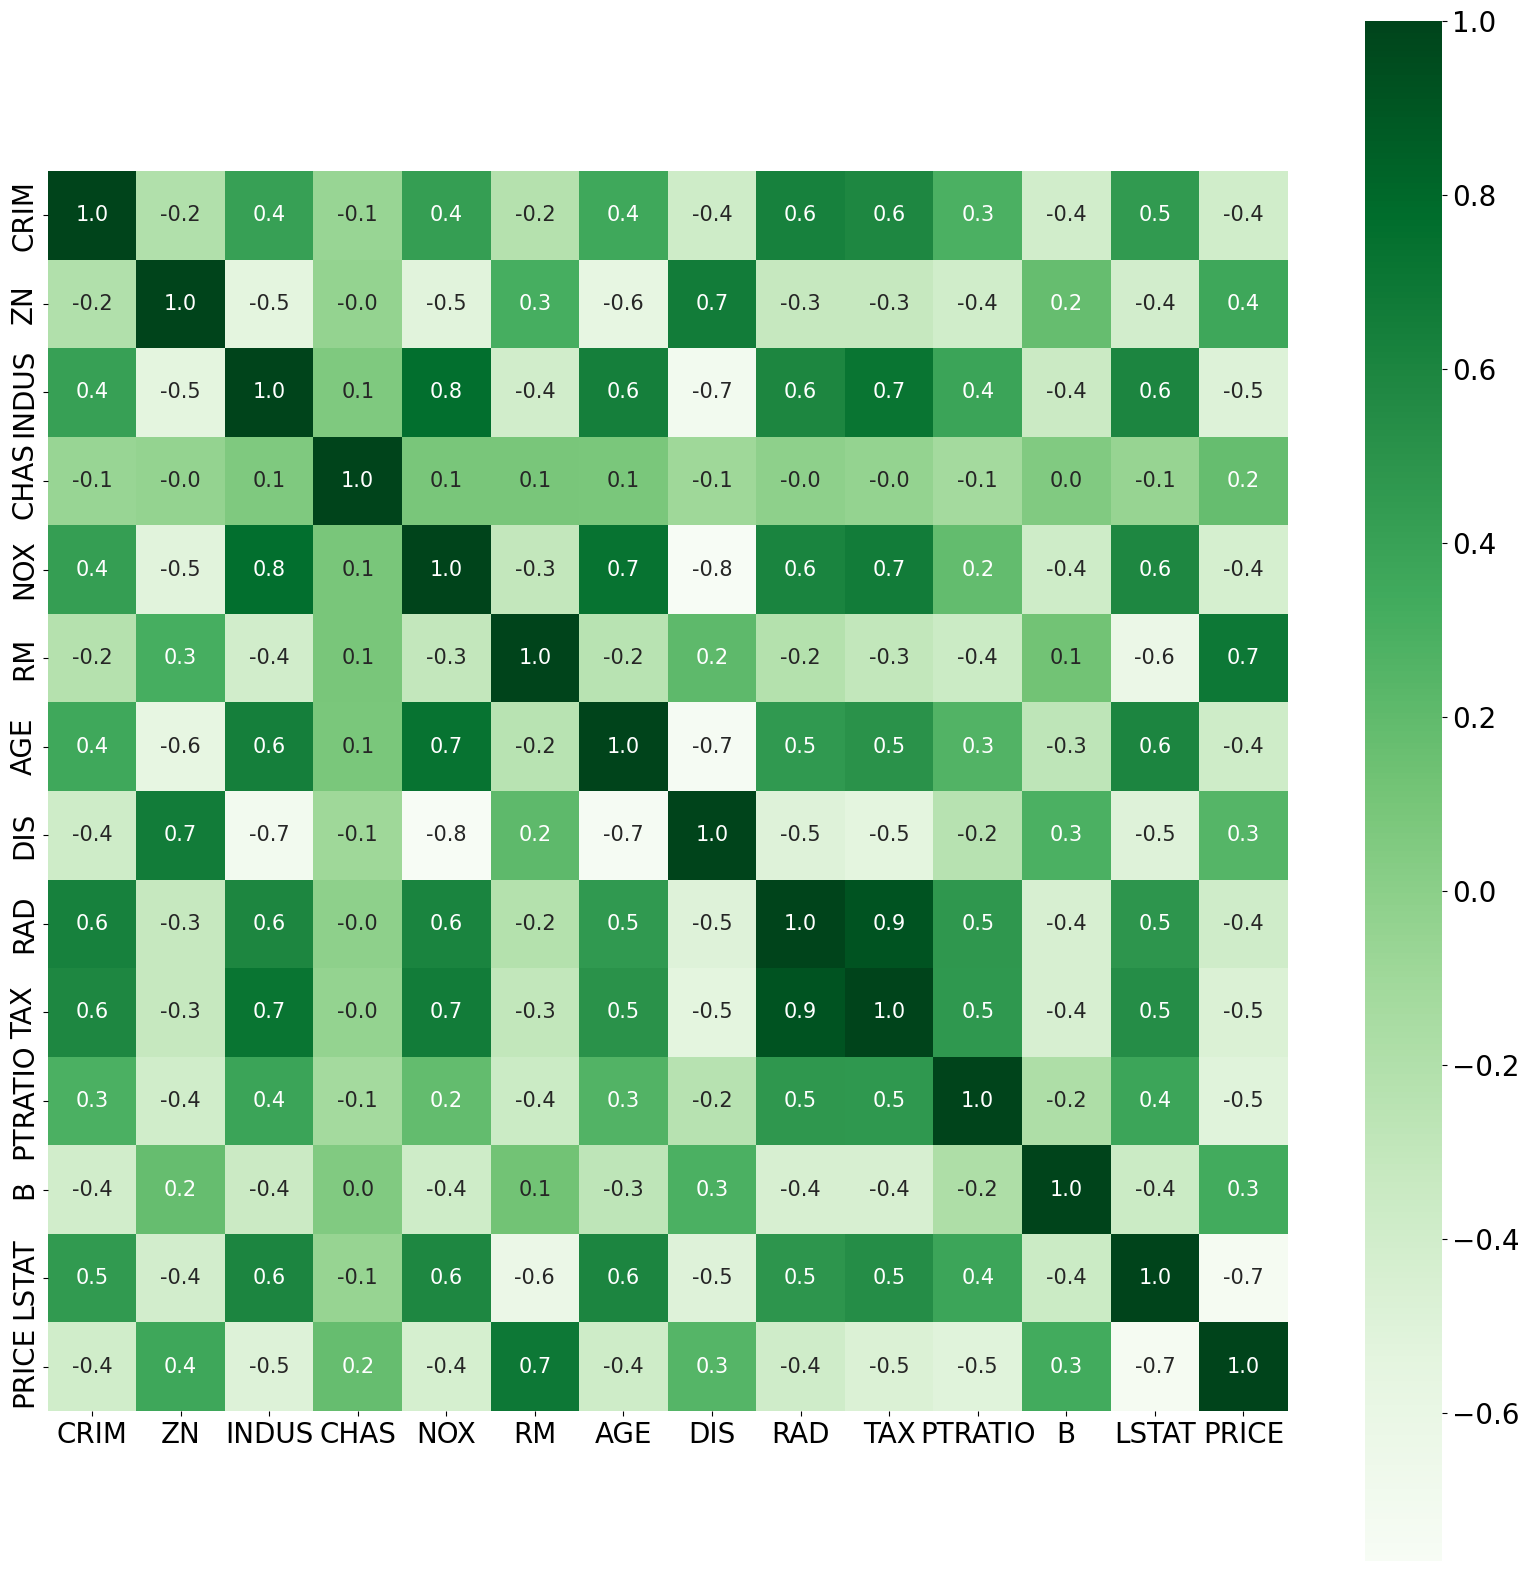

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
# To test if there are duplicates in the dataset or not
print ( data.duplicated() )

print ( data.duplicated().sum() )

0      False
1      False
2      False
3      False
4      False
       ...  
504    False
505    False
506    False
507    False
508    False
Length: 509, dtype: bool
4


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
# To get the number of null values in each feature ( missing values )
for feature in data :
    print( feature , " : " , data[feature].isna().sum() )

CRIM  :  0
ZN  :  0
INDUS  :  3
CHAS  :  0
NOX  :  2
RM  :  0
AGE  :  1
DIS  :  0
RAD  :  1
TAX  :  0
PTRATIO  :  0
B  :  0
LSTAT  :  1
PRICE  :  0


In [ ]:
#Total columns having missing values
cols_missing= data.isnull().sum() != 0
cols_missing.sum()

5

In [ ]:
data_col= data.select_dtypes(include=np.number)
for feature in data_col :
    data[feature].fillna(data[feature].median(), inplace=True)

In [ ]:
# To get the number of null values in each feature ( missing values )
for feature in data :
    print( feature , " : " , data[feature].isna().sum() )

CRIM  :  0
ZN  :  0
INDUS  :  0
CHAS  :  0
NOX  :  0
RM  :  0
AGE  :  0
DIS  :  0
RAD  :  0
TAX  :  0
PTRATIO  :  0
B  :  0
LSTAT  :  0
PRICE  :  0


In [ ]:
# To print all of the 4 quartiles & the lower bound of each feature
def show_percentiles_and_quartiles(feature):
    Q1=data[feature].quantile(0.25)
    Q2=data[feature].quantile(0.50)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    print("The Lower Quartile outlier is: {}".format(LR))
    print("The 25th Percentile is: {}".format(Q1))
    print("The 50th Percentile is: {}".format(Q2))
    print("The 75th Percentile is: {}".format(Q3))
    print("The Upper Quartile outlier is: {}".format(UR))

In [ ]:

# for feature in data :
#     fig = plt.subplots(figsize=(20, 10))
#     plt.rcParams.update({'font.size': 20})
#     sns.boxplot(data[feature])
#     plt.xlabel(feature)
#     plt.show()
#     show_percentiles_and_quartiles(feature)
#     print("__________________________________________________________________________________________________________________")

In [ ]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [ ]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(X_train)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 18.70%
Column ZN outliers = 19.26%
Column INDUS outliers = 0.00%
Column CHAS outliers = 143.06%
Column NOX outliers = 0.00%
Column RM outliers = 8.50%
Column AGE outliers = 0.00%
Column DIS outliers = 1.42%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 4.25%
Column B outliers = 21.53%
Column LSTAT outliers = 1.98%
Column PRICE outliers = 11.33%


<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


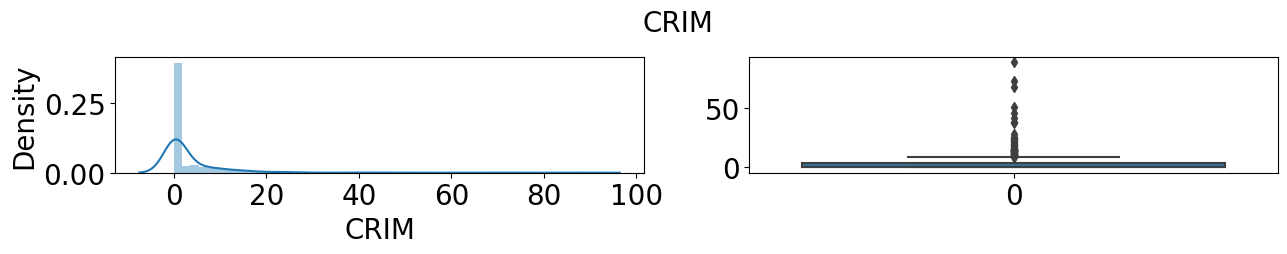

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


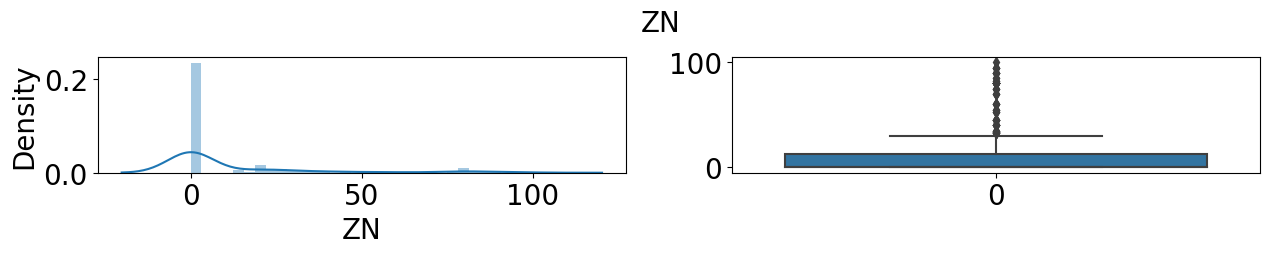

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


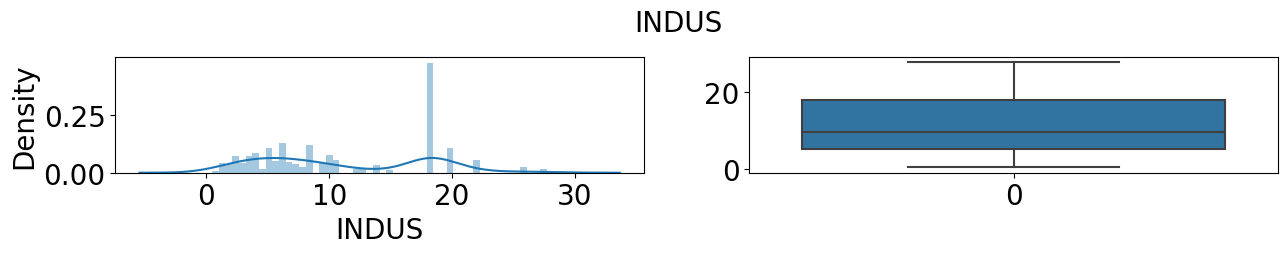

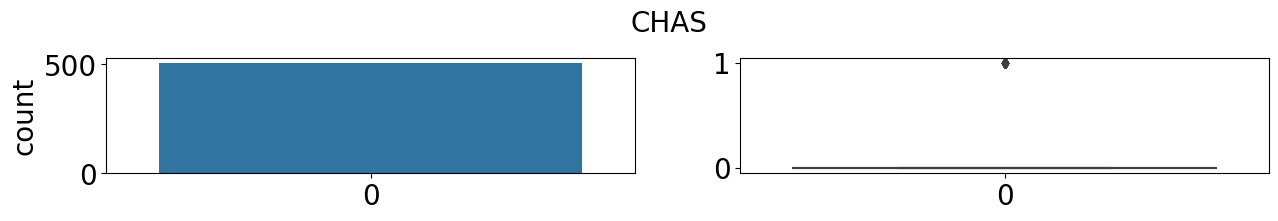

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


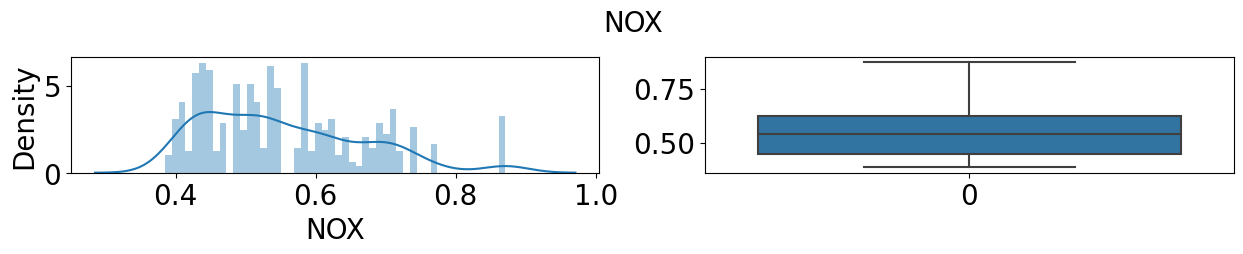

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


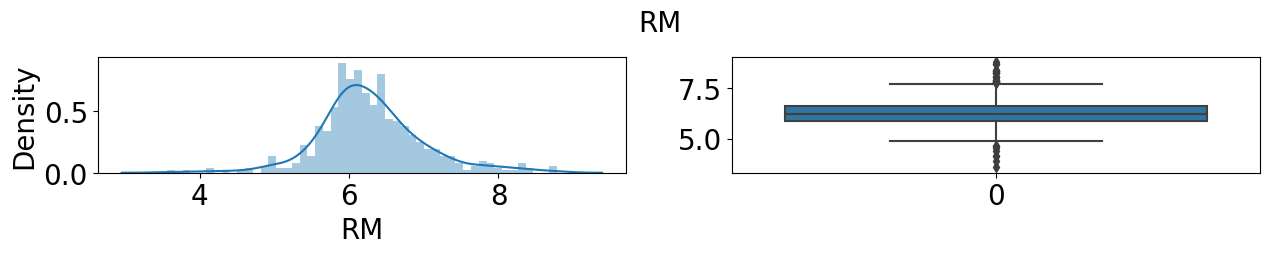

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


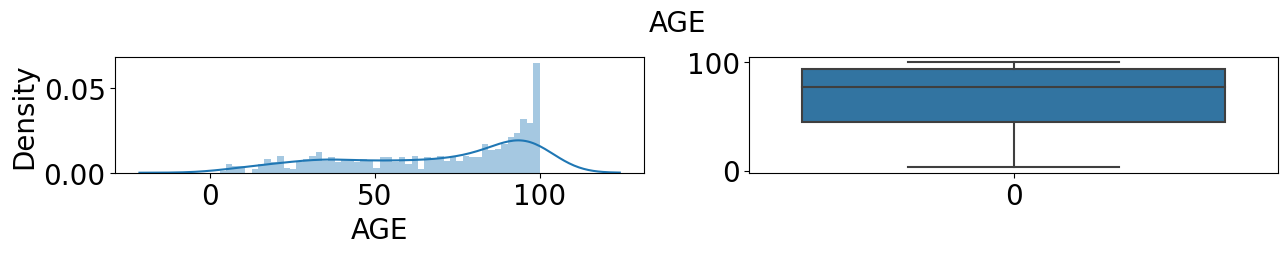

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


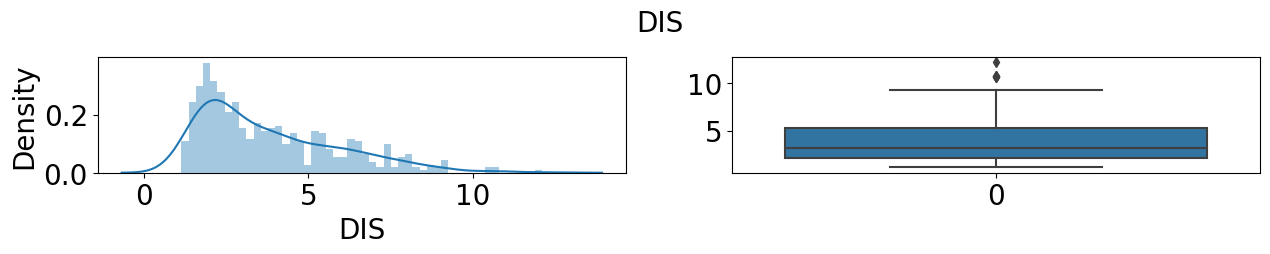

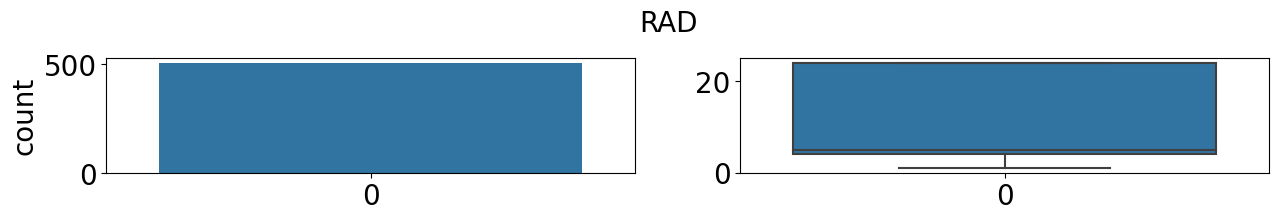

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


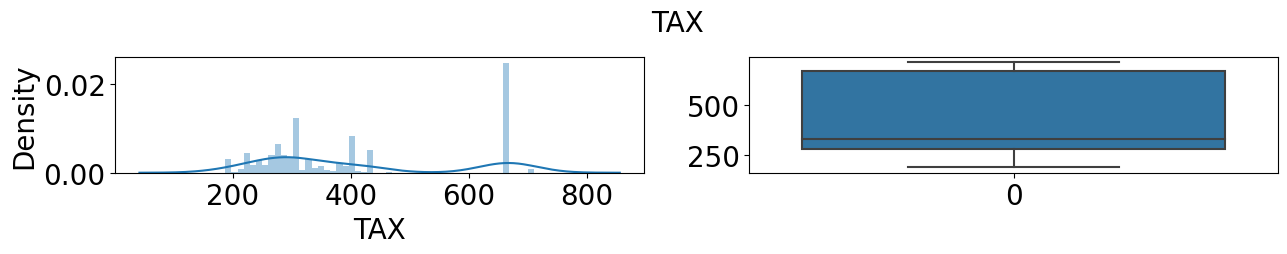

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


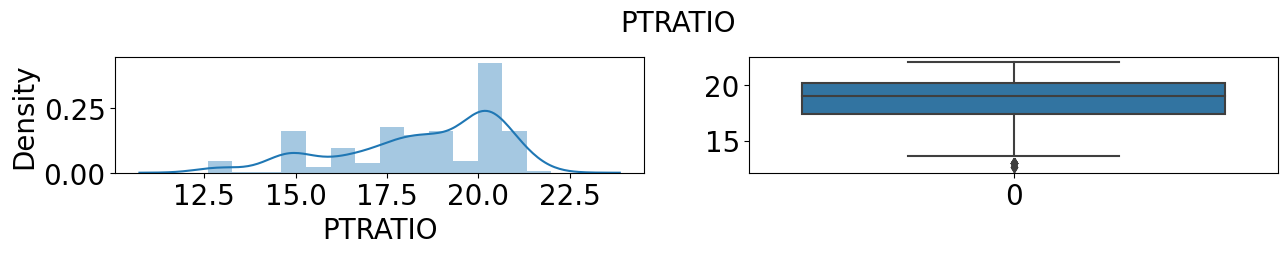

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


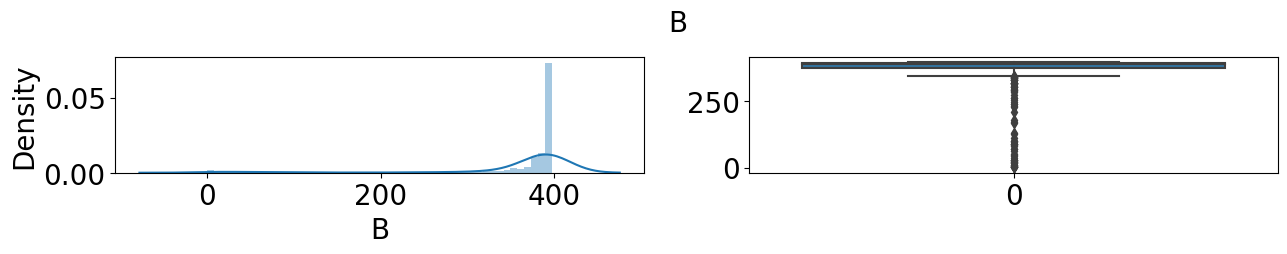

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


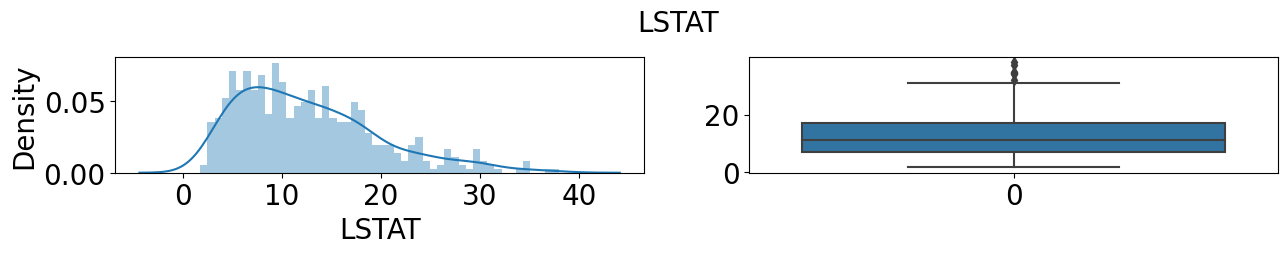

<ipython-input-97-7a46a48ee4d8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


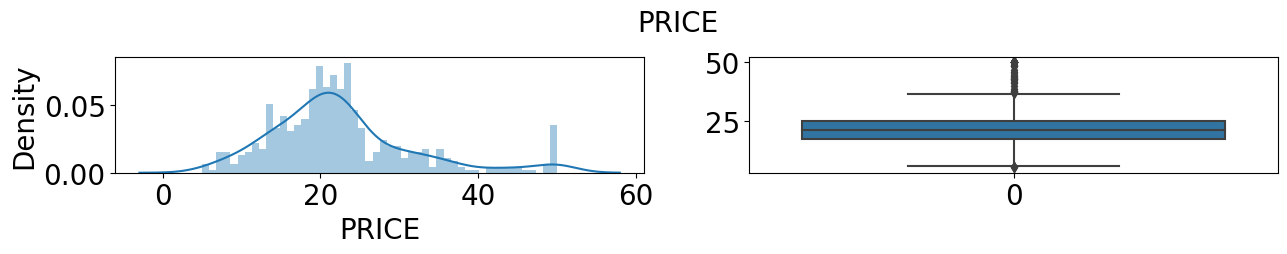

In [ ]:
for col in data.columns:
    fig,ax = plt.subplots(1,2,figsize=(15,1.5))
    if len(np.unique(data[col]))<10:
        sns.countplot(data[col],ax=ax[0])
    else:
        sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])

    sns.boxplot(data[col],ax=ax[1])
    plt.suptitle(col,fontsize=20,y=1.2)
    plt.show()

In [ ]:
# To replace outliers in specific features whether with max , min values in the column
for x in (data[['CRIM','ZN','PRICE','LSTAT','B',
                'RAD','PTRATIO','DIS','RM']]):
    Q3,Q1 = np.percentile(data.loc[:,x],[75,25])
    IQR = Q3-Q1

    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)

    data.loc[data[x] > max,x] = max
    data.loc[data[x] <min,x] = min

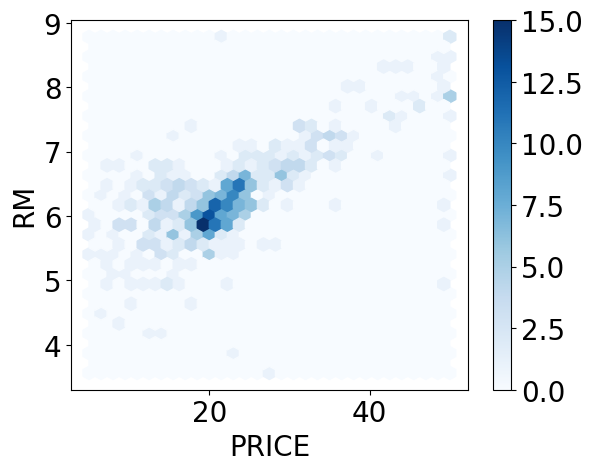

In [ ]:
# Extract the x and y columns
x = data['PRICE']
y = data['RM']

# Create a hexbin plot
plt.hexbin(x, y, cmap='Blues', gridsize=30)

# Add axis labels and a title
plt.xlabel('PRICE')
plt.ylabel('RM')


# Show the plot
plt.colorbar()
plt.show()

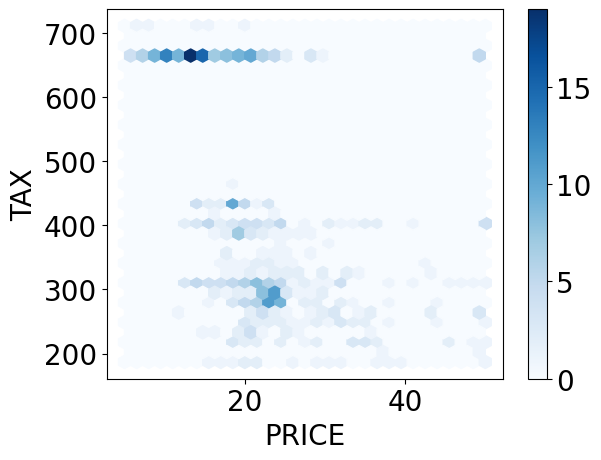

In [ ]:
# Extract the x and y columns
x = data['PRICE']
y = data['TAX']

# Create a hexbin plot
plt.hexbin(x, y, cmap='Blues', gridsize=30)

# Add axis labels and a title
plt.xlabel('PRICE')
plt.ylabel('TAX')


# Show the plot
plt.colorbar()
plt.show()

<Axes: xlabel='INDUS', ylabel='PRICE'>

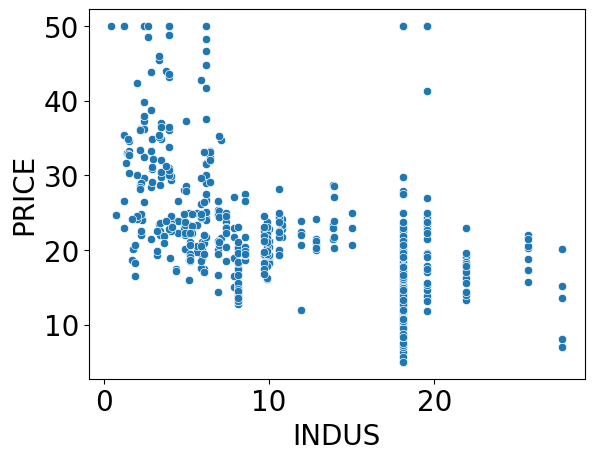

In [ ]:
sns.scatterplot(x='INDUS', y='PRICE', data=data)

### *StandardScaler*


> scaler = StandardScaler()

>  stds_new = scaler.fit_transform(X_train)



> stds_data = pd.DataFrame(data=stds_new, columns=X_train.columns)





z = (x - mean) / std

> Where:




1.   x is the value of a specific data point
2.   mean is the mean (average) of the dataset
3.   std is the standard deviation of the dataset




In [ ]:
scaler = StandardScaler()
stds_new = scaler.fit_transform(X_train)
stds_data = pd.DataFrame(data=stds_new, columns=X_train.columns)

### *Robust Scaler*


> rs = RobustScaler()

>  rs_new = rs.fit_transform(X_train)



> rs_data = pd.DataFrame(data=rs_new, columns=X_train.columns)



x_scaled = (x - Q1) / (Q3 - Q1)
> Where:


1.   x is the value of a specific data point.
2.   Q1 is the first quartile (25th percentile) of the dataset.
3.   Q3 is the third quartile (75th percentile) of the dataset.





In [ ]:
rs = RobustScaler()
rs_new = rs.fit_transform(X_train)
rs_data = pd.DataFrame(data=rs_new, columns=X_train.columns)

### Quantile Transformer


> qt = QuantileTransformer()

> qt_new = qt.fit_transform(X_train)

> qt_data = pd.DataFrame(data=qt_new, columns=X_train.columns)


It's important to assess the suitability of the Quantile Transformer for your specific data and task. Consider the assumptions, limitations, and desired properties of the transformed data before applying the algorithm. Additionally, it's always a good practice to evaluate the impact of the transformation on your downstream analysis or modeling tasks to ensure it enhances the desired outcomes.

In [ ]:
qt = QuantileTransformer()
qt_new = qt.fit_transform(X_train)
qt_data = pd.DataFrame(data=qt_new, columns=X_train.columns)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (353). n_quantiles is set to n_samples.
  warnings.warn(


### Yeo-Johnson Transformer
The Yeo-Johnson Transformer is a data transformation technique that extends the Box-Cox transformation to handle both positive and negative values. It is useful for normalizing data and stabilizing variance, making it suitable for certain statistical models and improving interpretability


>yeojohnTr = PowerTransformer(standardize=True)

> yeo_new = yeojohnTr.fit_transform(X_train)

> yeo_data = pd.DataFrame(data=yeo_new , columns=X_train.columns)







In [ ]:
yeojohnTr = PowerTransformer(standardize=True)
yeo_new = yeojohnTr.fit_transform(X_train)
yeo_data = pd.DataFrame(data=yeo_new , columns=X_train.columns)

### Choosing the most efficient transformer


> Result = Robust Scaler and Standard Scaler both are the best as, they have the lowest mean



In [ ]:
print("Means\n""Standard Scaler :",stds_data.skew().mean(),"\nRobust Scaler :",rs_data.skew().mean(),"\nQuantile Transformer :",qt_data.skew().mean(),"\nYeo-Johnson Transformer",yeo_data.skew().mean(),"\n")
skews = {'Standard Scaler': stds_data.skew(),'Robust Scaler': rs_data.skew(), 'Quantile Transformer': qt_data.skew(), 'Yeo-Johnson Transformer': yeo_data.skew()}
pd.DataFrame(skews)

Means
Standard Scaler : 0.25589217822188187 
Robust Scaler : 0.25589217822188187 
Quantile Transformer : 0.40855242994748525 
Yeo-Johnson Transformer 0.3311754858472453 



,Standard Scaler,Robust Scaler,Quantile Transformer,Yeo-Johnson Transformer
CRIM,0.600276,0.600276,6.452697e-08,0.295951
ZN,1.183327,1.183327,1.211691e+00,1.181707
INDUS,-0.109502,-0.109502,-5.130356e-02,-0.045090
CHAS,3.851756,3.851756,3.851756e+00,3.851756
NOX,0.104138,0.104138,9.193471e-03,0.022443
RM,0.047634,0.047634,8.722624e-05,-0.109072
AGE,-0.395254,-0.395254,6.247120e-02,-0.125677
DIS,0.065489,0.065489,2.877138e-04,0.011766
RAD,0.065717,0.065717,1.783908e-01,-0.120664
TAX,0.077941,0.077941,-6.863665e-02,-0.032714


### SimpleImputer is a class from the scikit-learn library that provides a simple strategy for imputing missing values in a dataset. The SimpleImputer class replaces missing values with a specified strategy, such as the mean, median, most frequent value, or a constant.
> from sklearn.impute import SimpleImputer


## Other available strategies are 'median', 'most_frequent', and 'constant'. If you choose 'constant', you can additionally specify the constant value using the fill_value parameter.

Fit the imputer to your data:



> imputer = SimpleImputer(strategy='mean')




## Here, X is your dataset, which should be a 2D array-like object.

Transform the data by replacing missing values:

> X_imputed = imputer.transform(X)

## This will return a new array, X_imputed, where missing values have been replaced according to the specified strategy.

Alternatively, you can combine steps 3 and 4 using the fit_transform method:


> X_imputed = imputer.fit_transform(X)






In [ ]:
my_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scales',StandardScaler()),
])
data =my_pipeline.fit_transform(X_train)
data = pd.DataFrame(data=data , columns=X_train.columns)
X_train=data.copy()
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.743285,-0.571763,0.559730,-0.245072,-1.104446,0.652883,-1.340052,1.088416,-0.490424,-0.627614,-1.216411,0.638885,-0.962843
1,0.662287,-0.571763,-0.244313,-0.245072,0.041850,-0.237015,1.073559,0.265723,-0.490424,-0.453523,1.420950,-2.243787,1.096411
2,0.159342,1.708088,-1.054614,-0.245072,0.916438,1.157104,0.562294,-0.808055,-0.216851,-0.898409,-1.919304,0.239394,0.508554
3,-0.640884,-0.571763,-0.003524,-0.245072,0.456588,-0.902760,-1.406579,-0.289553,0.001799,0.192621,0.196494,0.522906,0.827048
4,-0.097642,1.708088,-1.054614,-0.245072,0.916438,1.904276,0.759080,-0.801891,-0.216851,-0.898409,-1.919304,0.369374,-0.724775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,1.633557,-0.571763,1.025973,-0.245072,1.245304,-1.528704,1.124643,-1.565322,1.434975,1.365559,0.831644,0.638885,1.890070
349,-0.934629,1.793935,-1.760583,-0.245072,-1.575419,1.295501,-1.174568,1.428550,-1.351932,-0.260511,-1.980960,-0.558680,-0.440403
350,1.674392,-0.571763,1.025973,-0.245072,1.461086,-0.670016,0.883866,-1.062258,1.434975,1.365559,0.831644,0.464880,1.253496
351,-0.843582,-0.571763,-1.035702,-0.245072,-0.237534,-0.605818,-0.062670,-0.356501,-0.216851,-0.558023,-1.012792,0.521003,-0.247854


### Modeling



### To choose the best model based on the values obtained from cross-validation, you can consider several factors:


*   Mean Score: Look at the mean score of the negative mean squared error (MSE) for each model. Lower values indicate better performance
*   Standard Deviation:A lower standard deviation indicates more consistent performance across different folds of the data
## By considering these factors, you can make an informed decision on selecting the best model for your specific problem and data. It's important to note that choosing the best model is not solely based on cross-validated scores, but also on a combination of domain knowledge, requirements, and practical considerations.





In [ ]:
pipelines = []
pipelines.append(('LinearRegression', Pipeline([('LR',LinearRegression())])))
pipelines.append(('LASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ElasticNet', Pipeline([('EN', ElasticNet())])))
pipelines.append(('GradientBoostingRegressor', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('RandomForestRegressor', Pipeline([('RFR', RandomForestRegressor())])))
pipelines.append(('DecisionTreeRegressor', Pipeline([('DTR', DecisionTreeRegressor())])))
pipelines.append(('ExtraTreesRegressor', Pipeline([('ETR', ExtraTreesRegressor())])))
pipelines.append(('XGBRegressor', Pipeline([('XGBR', XGBRegressor(verbosity=0))])))
pipelines.append(('AdaBoostRegressor', Pipeline([('AdBR', AdaBoostRegressor())])))
pipelines.append(('SVR', Pipeline([('SVR', SVR())])))
pipelines.append(('KNeighborsRegressor', Pipeline([('KNR', KNeighborsRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LinearRegression: -21.042264 (10.688943)
LASSO: -26.109196 (16.603285)
ElasticNet: -27.775646 (21.298361)
GradientBoostingRegressor: -10.429652 (5.125257)
RandomForestRegressor: -11.905574 (7.718644)
DecisionTreeRegressor: -29.469752 (20.001298)
ExtraTreesRegressor: -11.704120 (8.050528)
XGBRegressor: -11.315096 (6.270929)
AdaBoostRegressor: -15.502679 (5.876482)
SVR: -27.955093 (24.062774)
KNeighborsRegressor: -22.343633 (17.122513)


## [GradientBoostingRegressor: -10.429652 (5.125257) ] is the best model with the lowest MSE

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=500)
gbr_model=gbr.fit(X_train,y_train)

gbr_scores = cross_val_score(gbr, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
gbr_pred = cross_val_predict(gbr, X_train, y_train, cv=20)
rmse_scores=np.sqrt(-gbr_scores)
# scores_map['GBR'] = rmse_scores
print("Gradient Boosting R2 score: ", r2_score(y_train, gbr_pred))
print('Gradient Boosting RMSE \n Mean:{:.3f}; Standard Deviation: {:.3f}'.format(rmse_scores.mean(),rmse_scores.std()))

Gradient Boosting R2 score:  0.8658343514045637
Gradient Boosting RMSE 
 Mean:2.993; Standard Deviation: 0.943
